In [ ]:
# Part 3
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize

In [ ]:
analyzer = SentimentIntensityAnalyzer()

def get_overall_sentiment(dialogue):
    sentiment_scores = [analyzer.polarity_scores(s)['compound'] for s in sent_tokenize(dialogue)]
    return pd.Series([
        sum(sentiment_scores) / len(sentiment_scores),  # Average sentiment
        max(sentiment_scores),  # Max sentiment
        min(sentiment_scores),  # Min sentiment
        np.std(sentiment_scores),  # Sentiment standard deviation (fluctuation)
    ], index=['avg_sentiment', 'max_sentiment', 'min_sentiment', 'sentiment_std'])

sentiment_features = episode_data['dialouge'].apply(get_overall_sentiment)
episode_data = pd.concat([episode_data, sentiment_features], axis=1)

print(episode_data[['avg_sentiment', 'max_sentiment', 'min_sentiment', 'sentiment_std', 'IMDb score ']].corr())

               avg_sentiment  max_sentiment  min_sentiment  sentiment_std  \
avg_sentiment       1.000000       0.620835      -0.255766       0.207916   
max_sentiment       0.620835       1.000000      -0.623538       0.683070   
min_sentiment      -0.255766      -0.623538       1.000000      -0.679223   
sentiment_std       0.207916       0.683070      -0.679223       1.000000   
IMDb score          0.103909       0.228678      -0.139976       0.223338   

               IMDb score   
avg_sentiment     0.103909  
max_sentiment     0.228678  
min_sentiment    -0.139976  
sentiment_std     0.223338  
IMDb score        1.000000  


In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.sentiment import SentimentIntensityAnalyzer

# Assuming episode_data is already loaded and processed

analyzer = SentimentIntensityAnalyzer()

In [ ]:
# List of important words (from your feature importance results)
important_words = ['dumb', 'told', 'win', 'answer', 'ahead']


In [ ]:
# Analyze word combinations
for word1 in important_words:
    for word2 in important_words:
        if word1 != word2:
            combination = f"{word1} {word2}"
            episode_data[combination] = episode_data['dialouge'].apply(lambda x: 1 if re.search(combination, x, re.IGNORECASE) else 0)
            print(f"Correlation for '{combination}':", episode_data[[combination, 'IMDb score ']].corr())


Correlation for 'dumb told':              dumb told  IMDb score 
dumb told          NaN          NaN
IMDb score         NaN          1.0
Correlation for 'dumb win':              dumb win  IMDb score 
dumb win          NaN          NaN
IMDb score        NaN          1.0
Correlation for 'dumb answer':              dumb answer  IMDb score 
dumb answer          NaN          NaN
IMDb score           NaN          1.0
Correlation for 'dumb ahead':              dumb ahead  IMDb score 
dumb ahead          NaN          NaN
IMDb score          NaN          1.0
Correlation for 'told dumb':              told dumb  IMDb score 
told dumb          NaN          NaN
IMDb score         NaN          1.0
Correlation for 'told win':              told win  IMDb score 
told win          NaN          NaN
IMDb score        NaN          1.0
Correlation for 'told answer':              told answer  IMDb score 
told answer          NaN          NaN
IMDb score           NaN          1.0
Correlation for 'told ahead':

In [ ]:

# Analyze sentiment/emotional patterns
for word in important_words:
    def get_word_sentiment(dialogue):
        sentences = sent_tokenize(dialogue)
        word_sentences = [s for s in sentences if re.search(word, s, re.IGNORECASE)]
        if word_sentences:
            sentiment_scores = [analyzer.polarity_scores(s)['compound'] for s in word_sentences]
            return sum(sentiment_scores) / len(sentiment_scores)
        else:
            return 0  # No sentiment if word isn't present

    episode_data[f"{word}_sentiment"] = episode_data['dialouge'].apply(get_word_sentiment)
    print(f"Correlation for '{word}_sentiment':", episode_data[[f"{word}_sentiment", 'IMDb score ']].corr())

Correlation for 'dumb_sentiment':                 dumb_sentiment  IMDb score 
dumb_sentiment        1.000000    -0.148385
IMDb score           -0.148385     1.000000
Correlation for 'told_sentiment':                 told_sentiment  IMDb score 
told_sentiment        1.000000     0.161309
IMDb score            0.161309     1.000000
Correlation for 'win_sentiment':                win_sentiment  IMDb score 
win_sentiment       1.000000    -0.203609
IMDb score         -0.203609     1.000000
Correlation for 'answer_sentiment':                   answer_sentiment  IMDb score 
answer_sentiment          1.000000    -0.106124
IMDb score               -0.106124     1.000000
Correlation for 'ahead_sentiment':                  ahead_sentiment  IMDb score 
ahead_sentiment          1.00000     -0.50491
IMDb score              -0.50491      1.00000


In [ ]:
# Part 4
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def dialogue_length_variation(dialogue):
    sentences = sent_tokenize(dialogue)
    sentence_lengths = [len(sentence.split()) for sentence in sentences]
    if sentence_lengths:
        return np.std(sentence_lengths)
    else:
        return 0

episode_data['dialogue_length_variation'] = episode_data['dialouge'].apply(dialogue_length_variation)

print(episode_data[['dialogue_length_variation', 'IMDb score ']].corr())

                           dialogue_length_variation  IMDb score 
dialogue_length_variation                   1.000000    -0.046479
IMDb score                                 -0.046479     1.000000


In [ ]:
# Part 5
import pandas as pd
import re


In [ ]:
# Assuming 'df' is your original DataFrame
def count_character_interactions(episode_df, char1, char2):
    """
    Counts the number of times char1 and char2 speak in sequence within an episode.

    Args:
        episode_df: DataFrame containing dialogue for a single episode.
        char1: The first character's name.
        char2: The second character's name.

    Returns:
        The number of interactions between char1 and char2.
    """
    interactions = 0
    speakers = episode_df['speaker'].tolist()
    for i in range(len(speakers) - 1):
        if (speakers[i] == char1 and speakers[i + 1] == char2) or \
           (speakers[i] == char2 and speakers[i + 1] == char1):
            interactions += 1
    return interactions


In [ ]:
# Group dialogue by episode
episode_dialogue_df = df.groupby(['Season No', 'Episode', 'episode no.'])['dialouge'].apply(list).reset_index()
episode_speaker_df = df.groupby(['Season No', 'Episode', 'episode no.'])['speaker'].apply(list).reset_index()
episode_df = pd.merge(episode_dialogue_df, episode_speaker_df, on=['Season No', 'Episode', 'episode no.'], how='left')


In [ ]:
# Calculate interaction features
episode_df['rick_morty_interactions'] = episode_df.apply(
    lambda row: count_character_interactions(
        df[(df['Season No'] == row['Season No']) & (df['episode no.'] == row['episode no.'])], 'Rick', 'Morty'
    ),
    axis=1
)

episode_df['rick_summer_interactions'] = episode_df.apply(
    lambda row: count_character_interactions(
        df[(df['Season No'] == row['Season No']) & (df['episode no.'] == row['episode no.'])], 'Rick', 'Summer'
    ),
    axis=1
)

episode_df['morty_summer_interactions'] = episode_df.apply(
    lambda row: count_character_interactions(
        df[(df['Season No'] == row['Season No']) & (df['episode no.'] == row['episode no.'])], 'Morty', 'Summer'
    ),
    axis=1
)


In [ ]:
# Merge back the interaction features into the main episode_data DataFrame.
episode_data = pd.merge(episode_data, episode_df[['Season No', 'episode no.', 'rick_morty_interactions', 'rick_summer_interactions', 'morty_summer_interactions']], on=['Season No', 'episode no.'], how='left')

print(episode_data[['rick_morty_interactions', 'rick_summer_interactions', 'morty_summer_interactions', 'IMDb score ']].corr())

                           rick_morty_interactions  rick_summer_interactions  \
rick_morty_interactions                   1.000000                  0.182772   
rick_summer_interactions                  0.182772                  1.000000   
morty_summer_interactions                 0.314684                  0.394990   
IMDb score                                0.029714                 -0.159682   

                           morty_summer_interactions  IMDb score   
rick_morty_interactions                     0.314684     0.029714  
rick_summer_interactions                    0.394990    -0.159682  
morty_summer_interactions                   1.000000    -0.189655  
IMDb score                                 -0.189655     1.000000  


In [ ]:
# Part 6 Visuals
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor  # Import the model
from sklearn.model_selection import train_test_split #Import the train test split

# Assuming 'episode_data' is your DataFrame with all the features and IMDb scores


In [ ]:
# 1. Feature Importance Bar Chart (Top 10)
def plot_feature_importance(importance_df, top_n=10):
    """Plots the top N feature importances."""
    print("Inside plot_feature_importance function...")  # Debugging print
    print(importance_df.head())  # Print the first few rows of importance_df
    print(importance_df.columns)  # Print the columns of importance_df
    plt.figure(figsize=(10, 6))
    top_importance = importance_df.head(top_n)
    sns.barplot(x='Importance', y='Feature', data=top_importance, palette='viridis')
    plt.title(f'Top {top_n} Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

Inside plot_feature_importance function...
    Feature  Importance
206    dumb    0.407257
890    told    0.085949
32   answer    0.082127
16    ahead    0.076455
970     win    0.050425
Index(['Feature', 'Importance'], dtype='object')


<ipython-input-48-527ccbd2be8b>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_importance, palette='viridis')


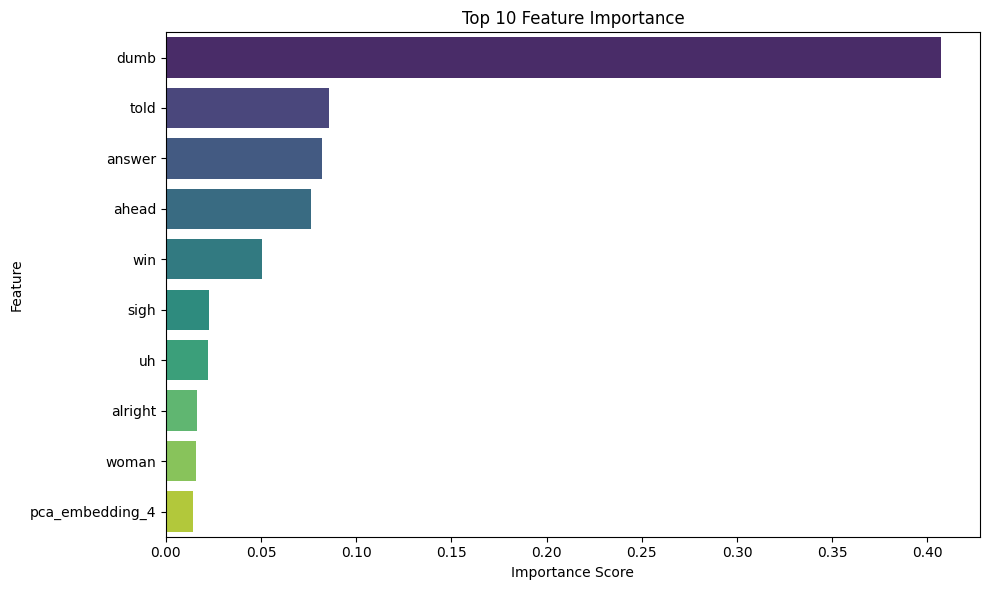

In [ ]:
plot_feature_importance(importance_df)

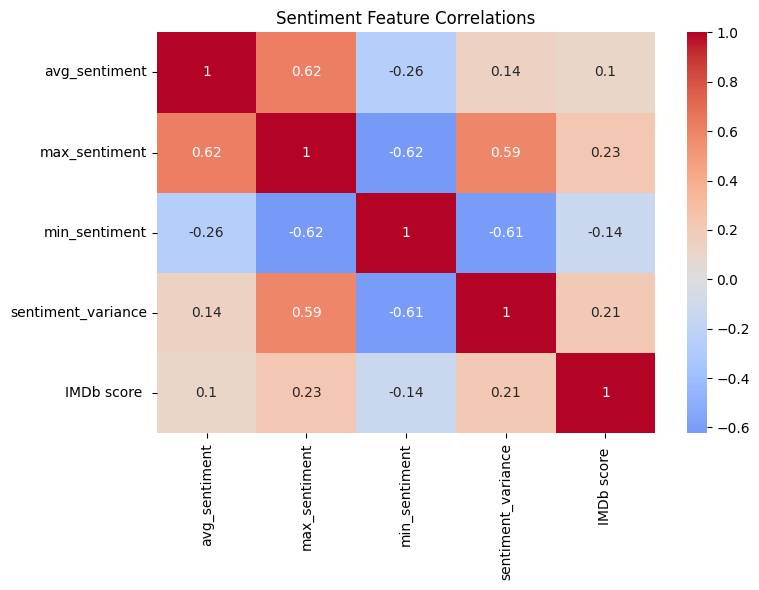

In [ ]:
# 2. Sentiment Correlation Heatmap
def plot_sentiment_correlation(data):
    """Plots a heatmap of correlations between sentiment features and IMDb score."""
    sentiment_cols = ['avg_sentiment', 'max_sentiment', 'min_sentiment', 'sentiment_variance', 'IMDb score ']
    sentiment_corr = data[sentiment_cols].corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(sentiment_corr, annot=True, cmap='coolwarm', center=0)
    plt.title('Sentiment Feature Correlations')
    plt.tight_layout()
    plt.show()

plot_sentiment_correlation(episode_data)

In [ ]:
# Create the top_words list from importance_df
top_words = importance_df['Feature'].tolist()

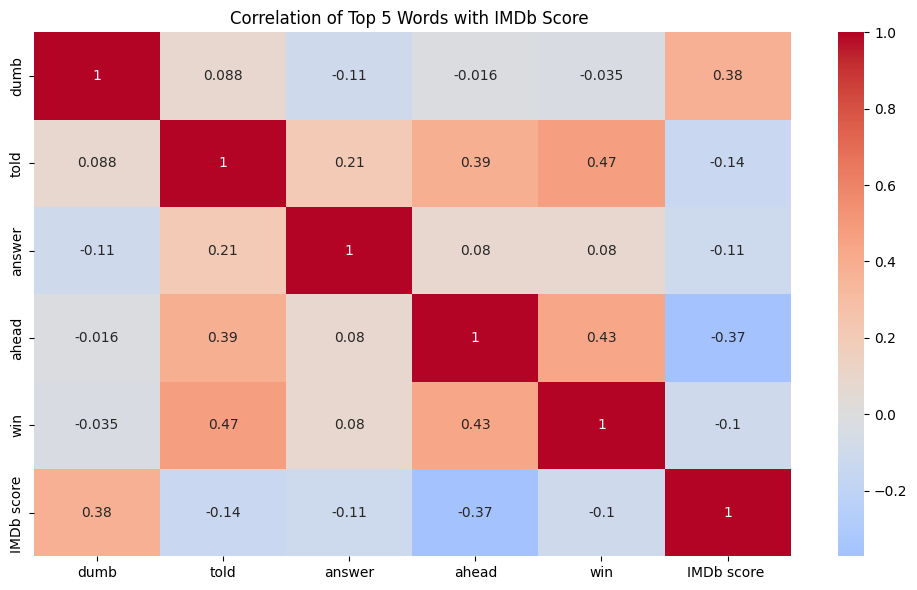

In [ ]:
# 5. Top Words Correlation
def plot_top_words_corr(episode_data, top_words, n_words=5):
    """Plots the correlation between top words and IMDb score."""
    plt.figure(figsize=(10, 6))

    # Ensure top_words are in episode_data
    valid_top_words = [word for word in top_words if word in episode_data.columns]
    if not valid_top_words:
        print("Error: None of the top_words are in episode_data.columns")
        return

    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(episode_data[valid_top_words[:n_words] + ['IMDb score ']])
    corr_matrix = np.corrcoef(scaled_data.T)
    sns.heatmap(
        corr_matrix,
        annot=True,
        cmap='coolwarm',
        center=0,
        xticklabels=valid_top_words[:n_words] + ['IMDb score '],
        yticklabels=valid_top_words[:n_words] + ['IMDb score '],
    )
    plt.title(f'Correlation of Top {n_words} Words with IMDb Score ')
    plt.tight_layout()
    plt.show()


# Example Usage (assuming you have 'episode_data' and 'top_words' defined):
plot_top_words_corr(episode_data, top_words)

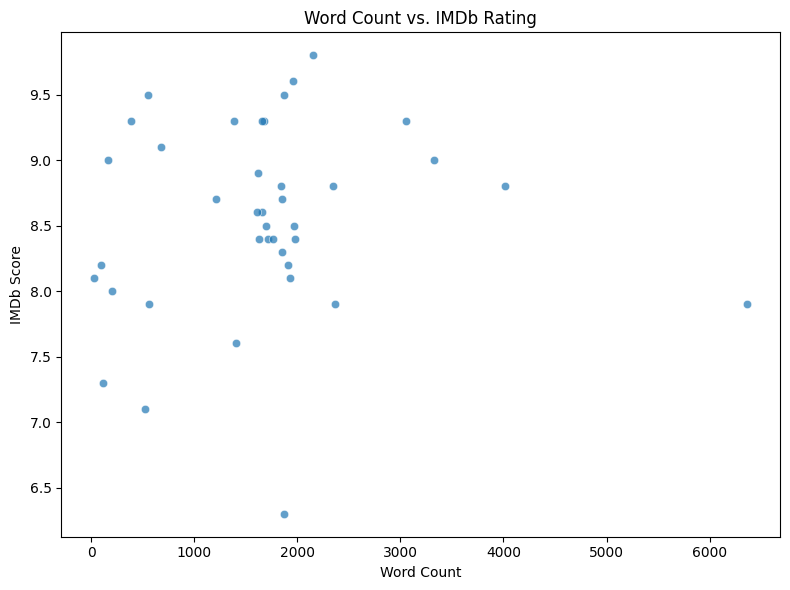

In [ ]:
# 6. Word Count vs. IMDb Score Scatter Plot
def plot_word_count_vs_imdb_score(data):
    """Plots a scatter plot of word count vs. IMDb score."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='word_count', y='IMDb score ', data=data, alpha=0.7)
    plt.title('Word Count vs. IMDb Rating')
    plt.xlabel('Word Count')
    plt.ylabel('IMDb Score')
    plt.tight_layout()
    plt.show()

plot_word_count_vs_imdb_score(episode_data)

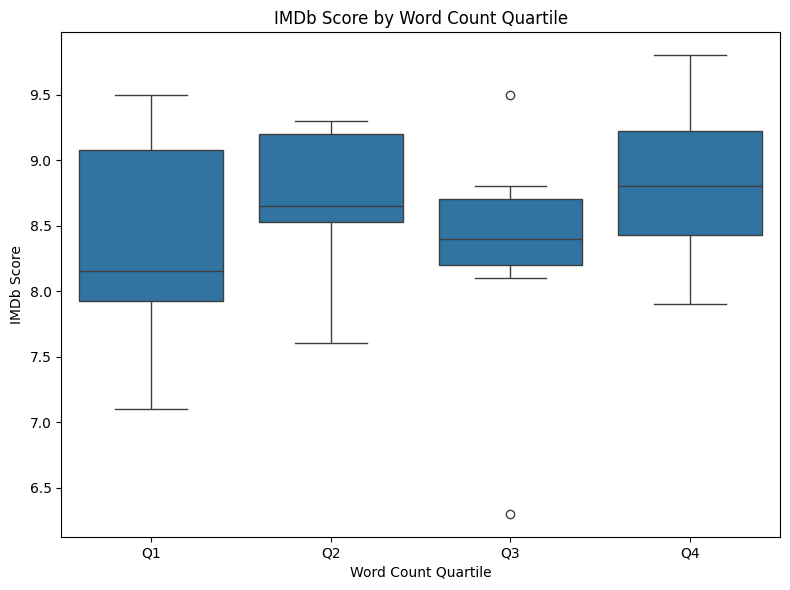

In [ ]:
# 7. IMDb Score by Word Count Quartile Boxplot
def plot_imdb_score_by_word_count_quartile(data):
    """Plots a boxplot to compare IMDb scores across quartiles of word count."""

    # Calculate quartiles of word_count
    data['word_count_quartile'] = pd.qcut(data['word_count'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

    plt.figure(figsize=(8, 6))
    sns.boxplot(x='word_count_quartile', y='IMDb score ', data=data)
    plt.title('IMDb Score by Word Count Quartile')
    plt.xlabel('Word Count Quartile')
    plt.ylabel('IMDb Score')
    plt.tight_layout()
    plt.show()

plot_imdb_score_by_word_count_quartile(episode_data)

In [ ]:
# Part 7
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

# Assuming 'episode_data' is your DataFrame with 'normalized_dialogue' and IMDb score

# 1. Word Frequency
def get_word_frequency(text):
    words = re.findall(r'\w+', text)
    return Counter(words)

episode_data['word_frequency'] = episode_data['normalized_dialogue'].apply(get_word_frequency)


In [ ]:
# 2. TF-IDF
vectorizer_tfidf = TfidfVectorizer(max_features=1000, stop_words='english', ngram_range=(1, 2))
tfidf_matrix = vectorizer_tfidf.fit_transform(episode_data['normalized_dialogue'])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer_tfidf.get_feature_names_out())
episode_data = pd.concat([episode_data, tfidf_df], axis=1)


In [ ]:
# 3. Analyze Relationship with IMDb
# Example: Correlation of specific words with IMDb score
print("\nCorrelation of TF-IDF words with IMDb score:")
print(episode_data[vectorizer_tfidf.get_feature_names_out().tolist() + ['IMDb score ']].corr()['IMDb score '].sort_values(ascending=False).head(10))



Correlation of TF-IDF words with IMDb score:
IMDb score     1.000000
true           0.435453
true           0.435170
rick           0.422012
rick           0.420521
citadel        0.394926
citadel        0.394076
hurt           0.384290
long           0.382765
hurt           0.382642
Name: IMDb score , dtype: float64
